Let's visualize the dataset

In [20]:
##Loading the data to memory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_filepath = "../data/UmeaSiblingBundlingMLDistances.csv"

all_data = pd.read_csv(data_filepath)

data = all_data.iloc[:,0:-2]

data.head()

,Cosine.FATHER_FORENAME,Cosine.FATHER_SURNAME,Cosine.MOTHER_FORENAME,Cosine.MOTHER_MAIDEN_SURNAME,Cosine.PARENTS_PLACE_OF_MARRIAGE,Cosine.PARENTS_DAY_OF_MARRIAGE,Cosine.PARENTS_MONTH_OF_MARRIAGE,Cosine.PARENTS_YEAR_OF_MARRIAGE,Damerau-Levenshtein.FATHER_FORENAME,Damerau-Levenshtein.FATHER_SURNAME,...,Metaphone-Levenshtein.PARENTS_MONTH_OF_MARRIAGE,Metaphone-Levenshtein.PARENTS_YEAR_OF_MARRIAGE,NYSIIS-Levenshtein.FATHER_FORENAME,NYSIIS-Levenshtein.FATHER_SURNAME,NYSIIS-Levenshtein.MOTHER_FORENAME,NYSIIS-Levenshtein.MOTHER_MAIDEN_SURNAME,NYSIIS-Levenshtein.PARENTS_PLACE_OF_MARRIAGE,NYSIIS-Levenshtein.PARENTS_DAY_OF_MARRIAGE,NYSIIS-Levenshtein.PARENTS_MONTH_OF_MARRIAGE,NYSIIS-Levenshtein.PARENTS_YEAR_OF_MARRIAGE
0,1.000,1.000,0.867,1.000,1.0,1.000,0.784,0.738,0.800,0.875,...,0,0,0.8,0.857,0.833,0.857,0.833,0,0,0
1,0.000,0.000,0.408,0.195,0.0,0.000,0.000,0.000,0.000,0.000,...,0,0,0.0,0.000,0.000,0.000,0.000,0,0,0
2,0.883,1.000,0.855,1.000,1.0,0.784,0.000,0.738,0.833,0.875,...,0,0,0.8,0.800,0.833,0.857,1.000,0,0,0
3,0.000,0.000,0.000,0.195,0.0,0.000,0.000,0.000,0.000,0.000,...,0,0,0.0,0.000,0.000,0.000,0.000,0,0,0
4,1.000,0.707,0.893,0.939,1.0,1.000,0.784,0.738,0.800,0.800,...,0,0,0.8,0.800,0.833,0.857,1.000,0,0,0


In [6]:
##information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862796 entries, 0 to 862795
Columns: 120 entries, Cosine.FATHER_FORENAME to NYSIIS-Levenshtein.PARENTS_YEAR_OF_MARRIAGE
dtypes: float64(114), int64(6)
memory usage: 789.9 MB


In [40]:
##Calculating some basic statistics

mean = data.mean()
std = data.std()
median = data.median()

In [11]:
%matplotlib inline

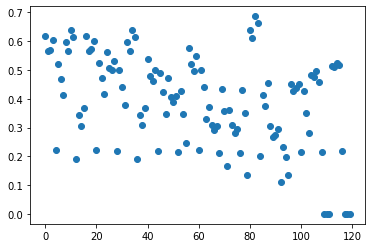

In [14]:
plt.scatter(range(len(mean)),mean)

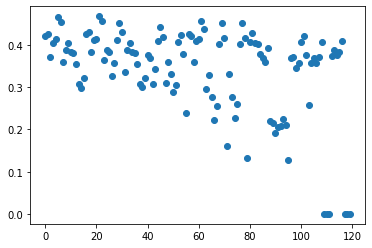

In [15]:
plt.scatter(range(len(std)),std)

Looks like we might be able to remove some of the columns with very low variance

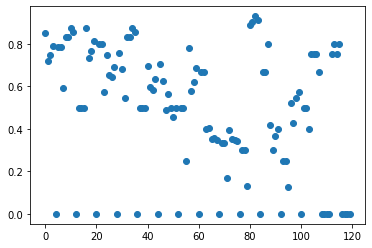

In [16]:
plt.scatter(range(len(median)),median)

Looks like some columns have a meidan of 0 and the pattern seems to be alternating at a constant rate

In [22]:
for i in range(len(median)):
    if(median[i] == 0):
        print(i)

4
12
20
28
36
44
52
60
68
76
84
92
100
108
109
110
111
116
117
118
119


Looks like we see the octate pattern (observed in all_correlation_tests.ipynb) again (group 5).

But why is the median 0?

In [23]:
data.iloc[:,20]

0         1.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
862791    0.0
862792    0.0
862793    0.0
862794    0.0
862795    0.0
Name: Jaccard.PARENTS_PLACE_OF_MARRIAGE, Length: 862796, dtype: float64

In [39]:
data.iloc[:,12]

0         0.909
1         0.000
2         0.909
3         0.000
4         0.909
          ...  
862791    0.000
862792    0.000
862793    0.000
862794    0.000
862795    0.000
Name: Damerau-Levenshtein.PARENTS_PLACE_OF_MARRIAGE, Length: 862796, dtype: float64

In [37]:
data.iloc[:,20]

0         1.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
862791    0.0
862792    0.0
862793    0.0
862794    0.0
862795    0.0
Name: Jaccard.PARENTS_PLACE_OF_MARRIAGE, Length: 862796, dtype: float64

In [36]:
data.iloc[:,36]

0         0.909
1         0.000
2         0.909
3         0.000
4         0.909
          ...  
862791    0.000
862792    0.000
862793    0.000
862794    0.000
862795    0.000
Name: Levenshtein.PARENTS_PLACE_OF_MARRIAGE, Length: 862796, dtype: float64

Looks like it is because there are only 0 and one other possible value in these columns where 0 is the most common data point

Because of the high correlation we observed in each octate group, let's test the statistics, individually

In [41]:
octate = []

column_names = "00,01,02,03,04,05,06,07,08,09,10,11,12,13,14".split(",")
column_index = 0

for i in range(len(data.columns)):
    if(int(i/8)==0):
        octate.append(pd.DataFrame())
    
    dataframe = octate[i%8]
    dataframe = dataframe.assign(e=pd.Series(data.iloc[:,i]).values)
    dataframe.rename(columns={"e":column_names[int(i/8)]},inplace=True)
    octate[i%8] = dataframe

Scatter plot of the median, standard deviation, and mean values for each octate group, respectively

<Figure size 432x288 with 0 Axes>

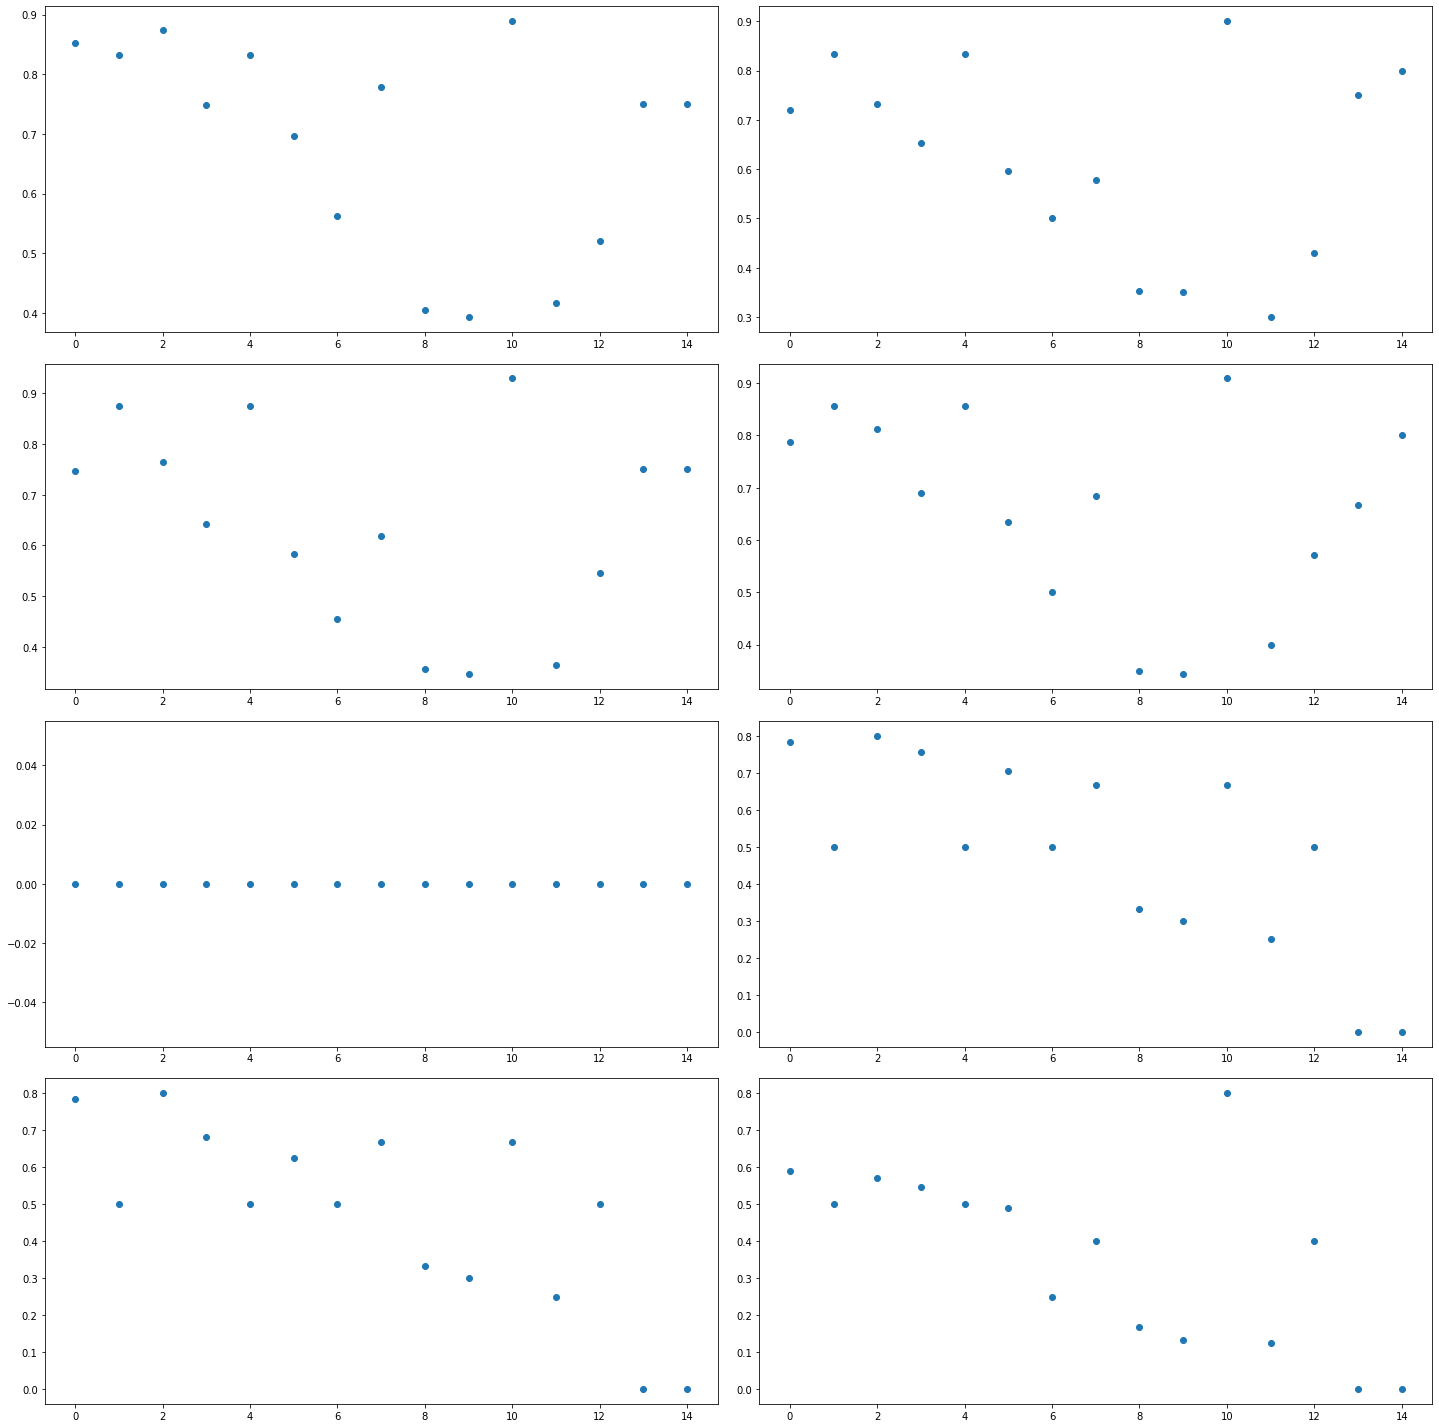

In [45]:
f = plt.figure()

f, axes = plt.subplots(nrows=4,ncols=2)

f.set_figwidth(20)
f.set_figheight(20)
f.tight_layout()

counter = 0
for i in range(4):
    for ii in range(2):
        median = octate[counter].median()
        sc = axes[i][ii].scatter(range(len(median)),median)
        counter+=1

<Figure size 432x288 with 0 Axes>

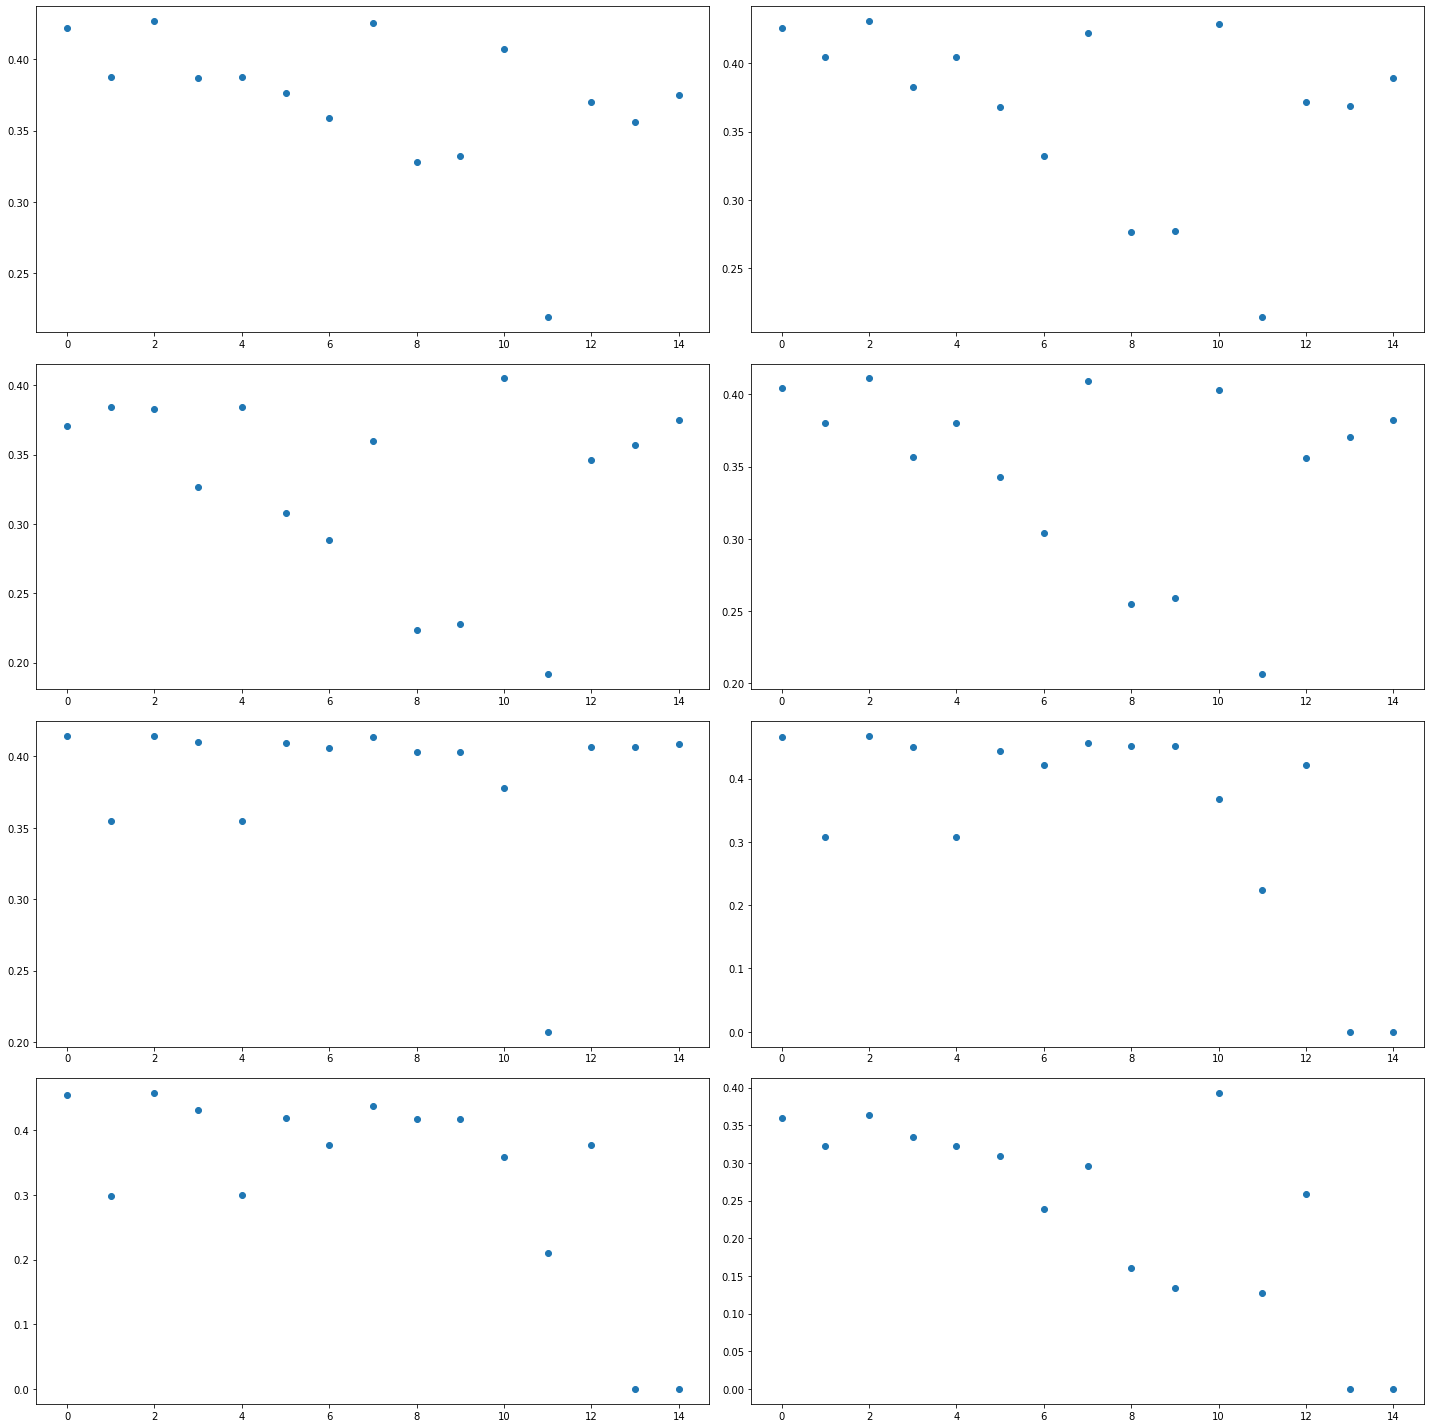

In [46]:
f = plt.figure()

f, axes = plt.subplots(nrows=4,ncols=2)

f.set_figwidth(20)
f.set_figheight(20)
f.tight_layout()

counter = 0
for i in range(4):
    for ii in range(2):
        std = octate[counter].std()
        sc = axes[i][ii].scatter(range(len(std)),std)
        counter+=1

<Figure size 432x288 with 0 Axes>

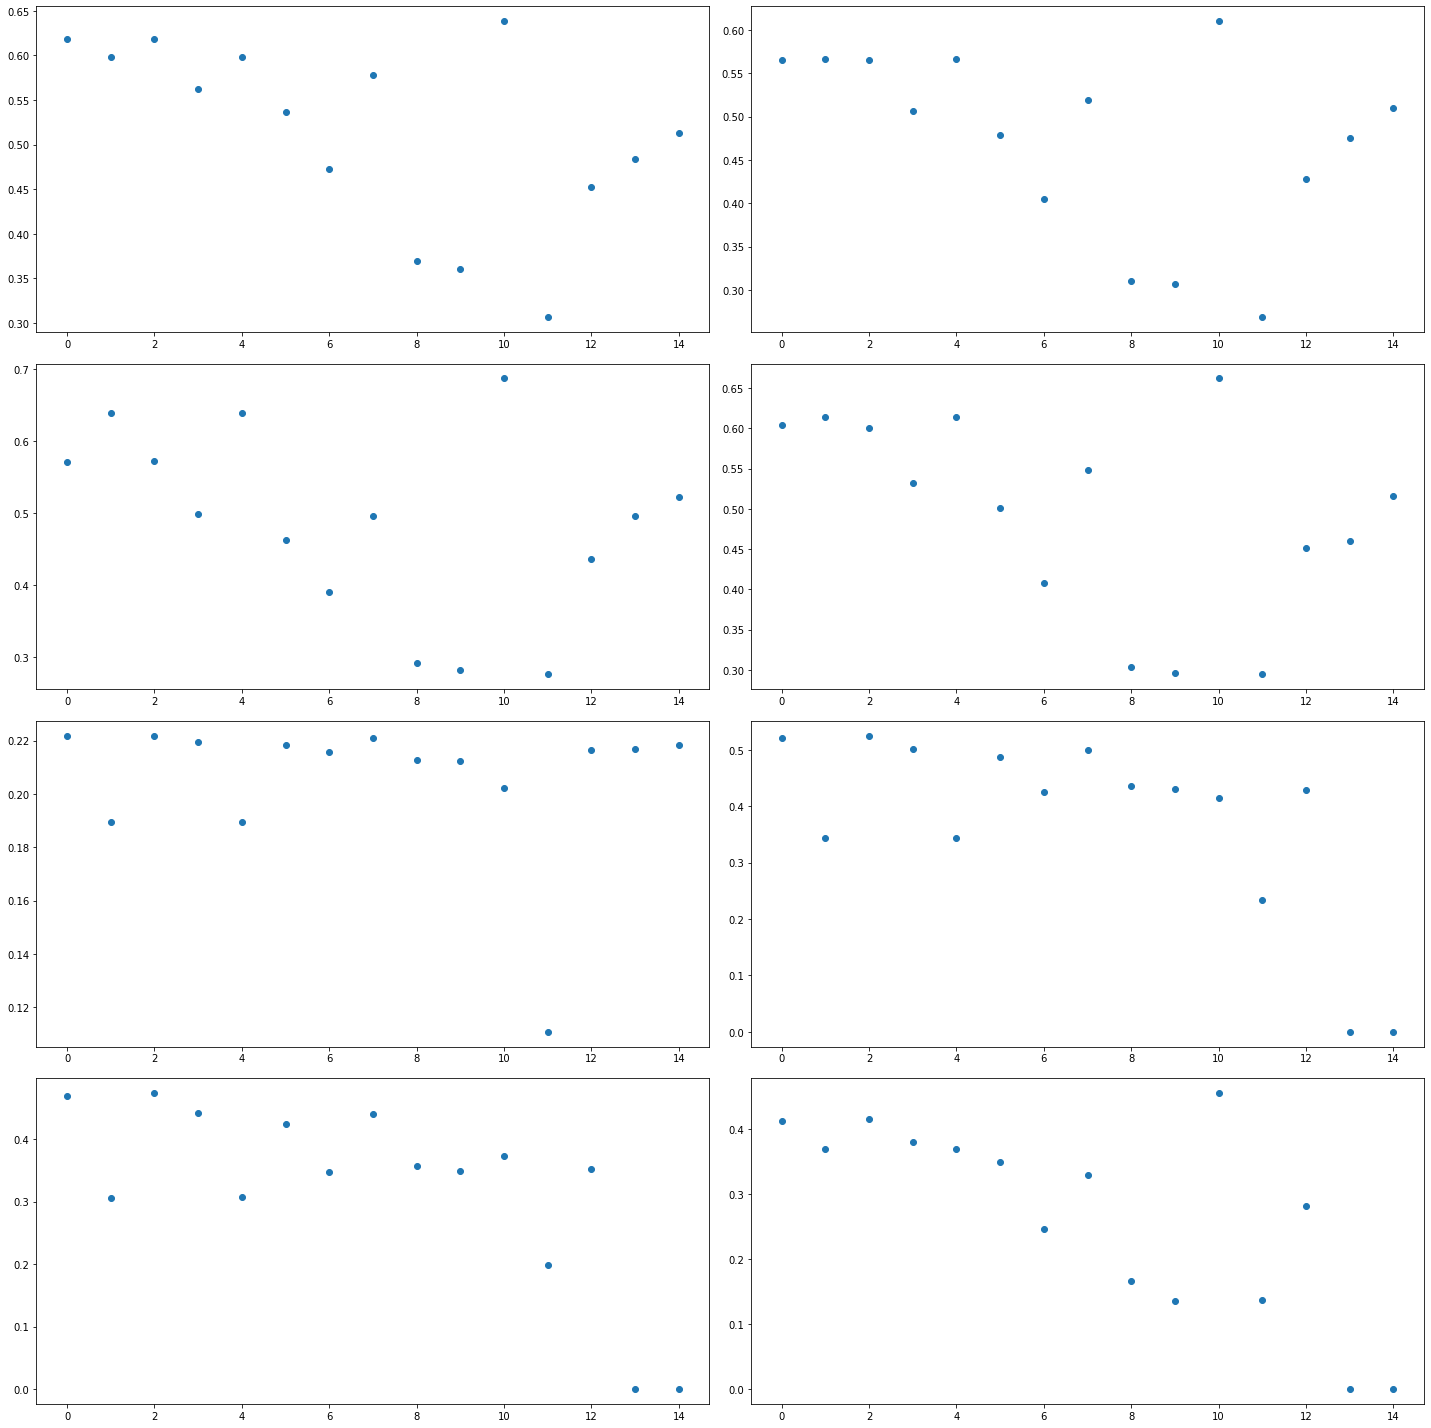

In [49]:
f = plt.figure()

f, axes = plt.subplots(nrows=4,ncols=2)

f.set_figwidth(20)
f.set_figheight(20)
f.tight_layout()

counter = 0
for i in range(4):
    for ii in range(2):
        mean = octate[counter].mean()
        sc = axes[i][ii].scatter(range(len(mean)),mean)
        counter+=1

Looks like there aren't any patterns in their means/standard deviations/ medians

From the heatmap of the correlation matrix of all 120 columns in the dataset, drawn in all_correlation_tests.ipynb, we notice some columns being entirely blank. We will take a look at what is going on in those columns.

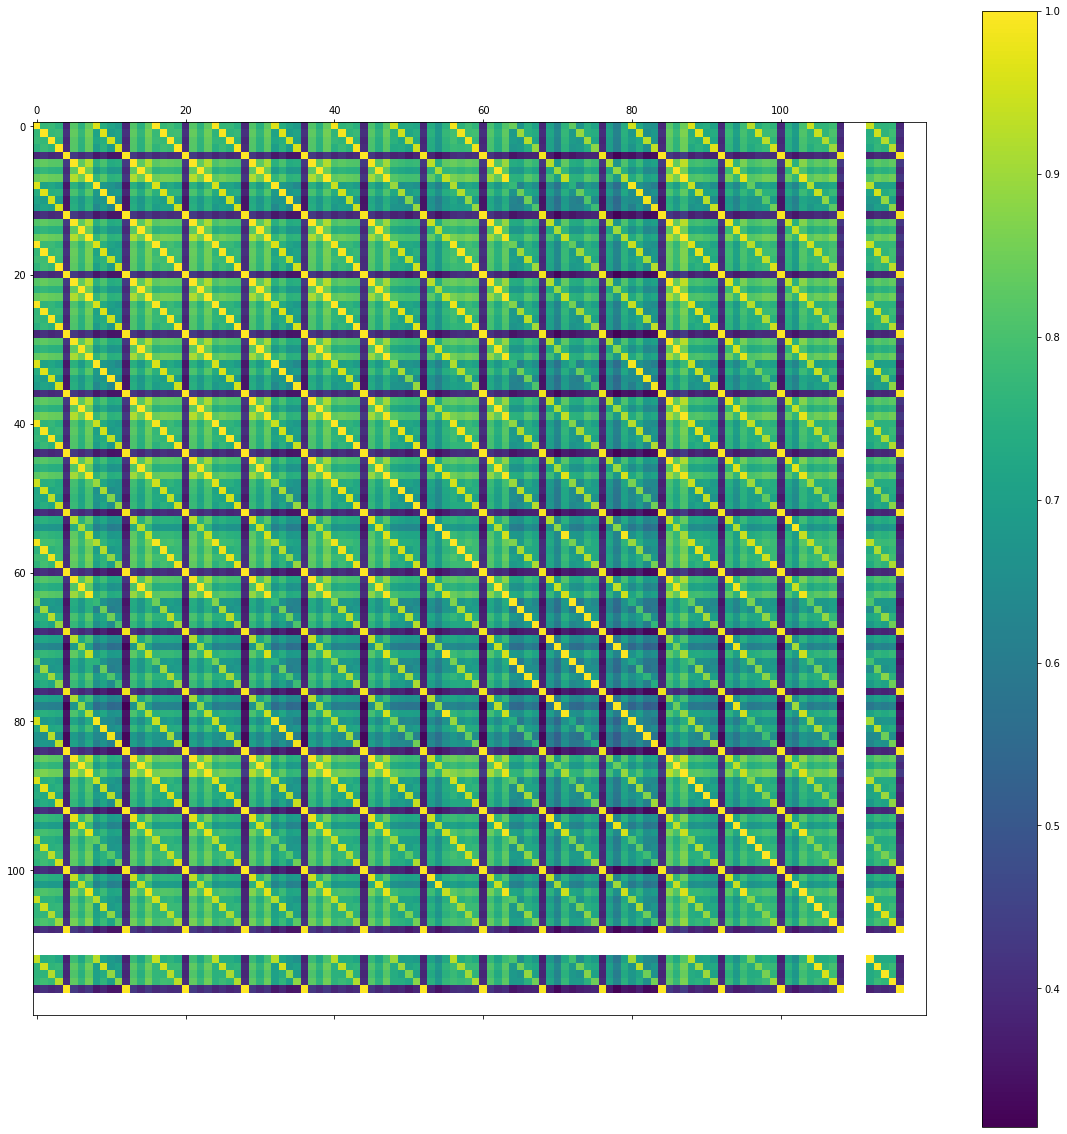

In [50]:
f = plt.figure(figsize=(20,20))

plt.matshow(data.corr(), fignum=f.number)
plt.colorbar()

Looks like blank columns are 109,110,111,117,118,119. Let's take a peek inside these columns

In [58]:
wierdcolumns = [109,110,111,117,118,119]

In [65]:
for i in range(len(wierdcolumns)):
    print(data.iloc[:,wierdcolumns[i]])

0         0
1         0
2         0
3         0
4         0
         ..
862791    0
862792    0
862793    0
862794    0
862795    0
Name: Metaphone-Levenshtein.PARENTS_DAY_OF_MARRIAGE, Length: 862796, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
862791    0
862792    0
862793    0
862794    0
862795    0
Name: Metaphone-Levenshtein.PARENTS_MONTH_OF_MARRIAGE, Length: 862796, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
862791    0
862792    0
862793    0
862794    0
862795    0
Name: Metaphone-Levenshtein.PARENTS_YEAR_OF_MARRIAGE, Length: 862796, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
862791    0
862792    0
862793    0
862794    0
862795    0
Name: NYSIIS-Levenshtein.PARENTS_DAY_OF_MARRIAGE, Length: 862796, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
862791    0
862792    0
862793    0
862794    0
862795    0
Name: NYSIIS

Let's test if all the columns are blank

In [71]:
for i in range(len(wierdcolumns)):
    relevant_column = data.columns[wierdcolumns[i]]
    print(data[relevant_column].value_counts())
    print("\n=======================================\n")
    

0    862796
Name: Metaphone-Levenshtein.PARENTS_DAY_OF_MARRIAGE, dtype: int64


0    862796
Name: Metaphone-Levenshtein.PARENTS_MONTH_OF_MARRIAGE, dtype: int64


0    862796
Name: Metaphone-Levenshtein.PARENTS_YEAR_OF_MARRIAGE, dtype: int64


0    862796
Name: NYSIIS-Levenshtein.PARENTS_DAY_OF_MARRIAGE, dtype: int64


0    862796
Name: NYSIIS-Levenshtein.PARENTS_MONTH_OF_MARRIAGE, dtype: int64


0    862796
Name: NYSIIS-Levenshtein.PARENTS_YEAR_OF_MARRIAGE, dtype: int64




Because these columns are filled with zeroes, we can consider removing these completely

**1 hour visualizing data**

**Total time : 12.5 hours**

1. (2 hrs) researching about feature selection
2. (4 hours) playing around with top-100 csv file
3. (.5 hours) researching about correlation metrics
4. (1 hour) figuring out pearson correlation assumption tests
5. (2.5 hours) carrying out all the tests done in top-100 csv file in the entire dataset
6. (.5 hours) researching about chi2 feature selection
7. (1 hour) compiling summary so far
8. (1 hour) visualizing statistics about each column